Hello! My name is Csaba Medgyes and my neptun code is RF8I8P. In case of Python updates we should start with the used functions and libraries.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen
import collections
from scipy.io import wavfile

## 1) Import five 256x256 pixel images, print them out and print the R G B values seperately in a histogram.

First we import the five images and print them out.

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


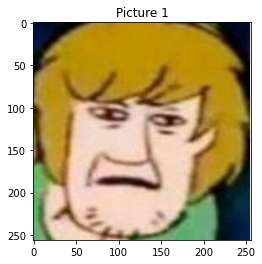

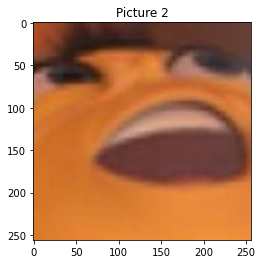

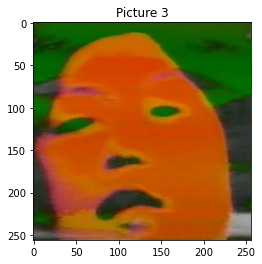

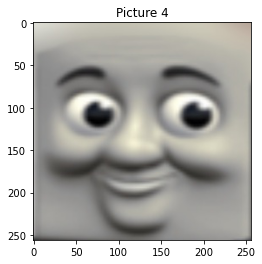

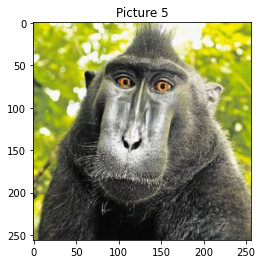

In [10]:
#start with a list which has all the image names.
image_names = ['pic1.jpg','pic2.jpg','pic3.jpg','pic4.jpg','pic5.jpg']

#converting the images (after reading them in) into numpy arrays

image_array = [np.asarray(plt.imread(name)) for name in image_names]

#checking the shape (size) of these

for i in range(len(image_array)):
    print(image_array[i].shape)
    
#now we should print them out

for i, image_data in enumerate(image_array):
    plt.imshow(image_data)
    plt.title('Picture '+ str(i+1))
    plt.show()

Now we print the R G B values seperately for each picture in a historgram.

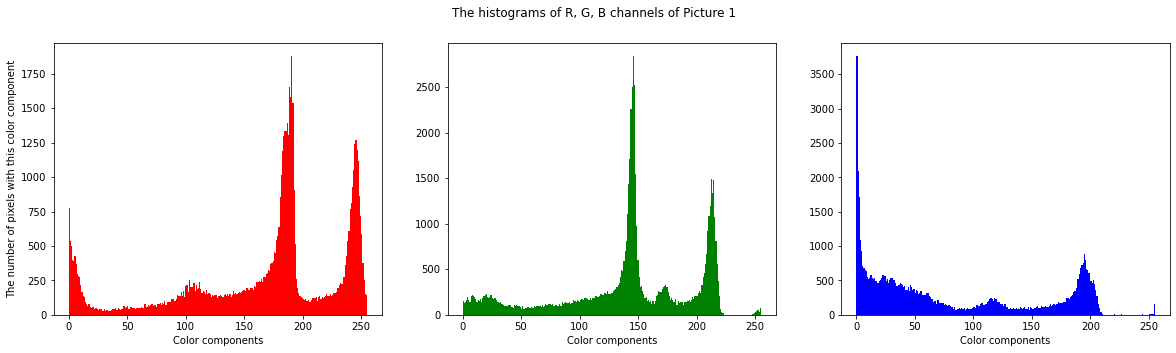

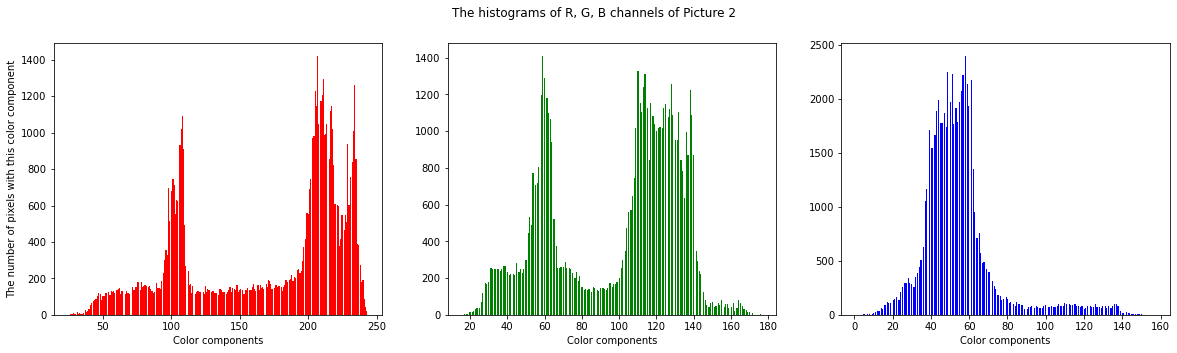

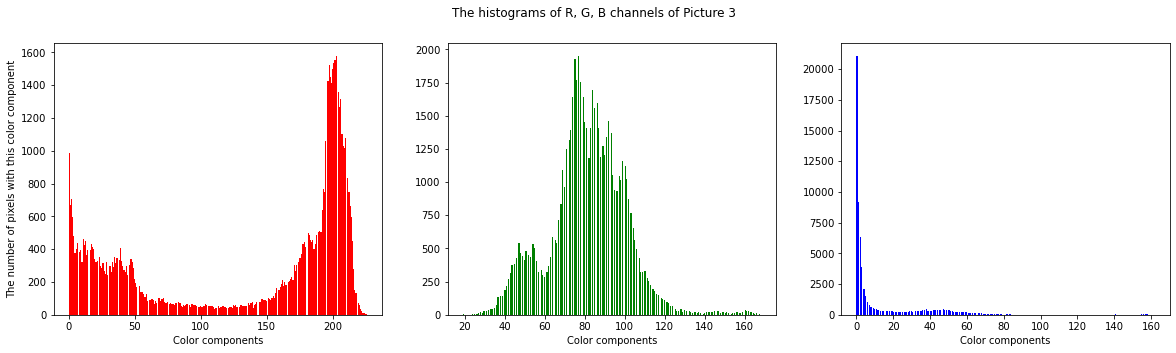

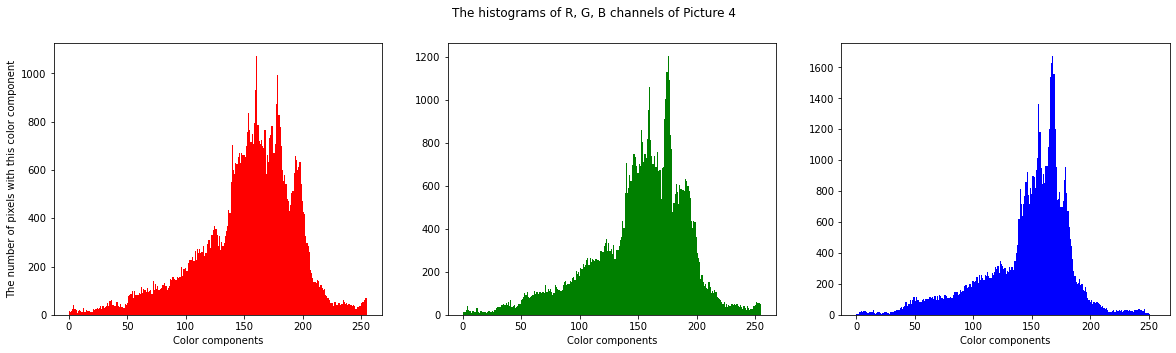

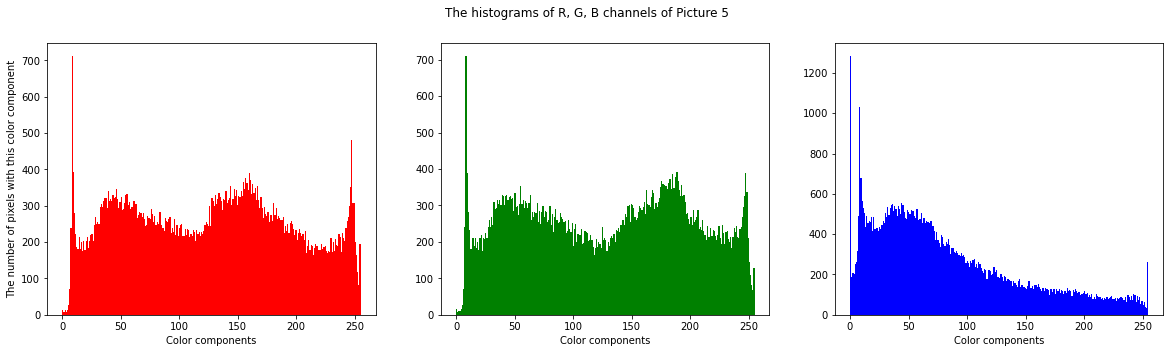

In [11]:
#for each picture we make three histograms

for image_number in range(5):
    
    fig, axs = plt.subplots(1, 3, figsize=(20,5))
    
    fig.suptitle('The histograms of R, G, B channels of Picture ' + str(image_number + 1))
    
    #selecting the red channel from the data and reshaping it in the form (256*256,1) 
    axs[0].hist(image_array[image_number][:,:,0].reshape(256*256,), bins=256, color='r')
    
    #selecting the green channel
    axs[1].hist(image_array[image_number][:,:,1].reshape(256*256,), bins=256, color='g')
    
    #selecting the blue channel
    axs[2].hist(image_array[image_number][:,:,2].reshape(256*256,), bins=256, color='b')
    
    axs[0].set(ylabel='The number of pixels with this color component')
    
    for ax in axs.flat:
        ax.set(xlabel='Color components')
        
    plt.show()

# 2) Calculate the mean and the deviation for all color channels for all pictures, then transform it into 0 mean data with 1 deviation. After this check the expected value and deviation.

In [12]:
channels = {0:'Red', 1:'Green', 2:'Blue'}

for picture_number in range(5):
    
    for channel_number in range(3):
        
        print('Picture '+ str (picture_number + 1) + ', Color channel: ' + channels[channel_number])
        
        mean = image_array[picture_number][:,:,channel_number].reshape(256*256,).mean()
        
        standard_deviation = image_array[picture_number][:,:,channel_number].reshape(256*256,).std()
        
        print('Mean: ' + str(mean) + ', Standard Deviation: ' + str(standard_deviation))

        after_trafo_mean = ((image_array[picture_number][:,:,channel_number].reshape(256*256,) - mean) / (standard_deviation)).mean()
        
        after_trafo_sd = ((image_array[picture_number][:,:,channel_number].reshape(256*256,) - mean) / (standard_deviation)).std()
        
        print('After transformation the Mean is: ' + str(after_trafo_mean) + 'and the Standard Deviation is: ' + str(after_trafo_sd))

Picture 1, Color channel: Red
Mean: 167.02883911132812, Standard Deviation: 69.71979959916304
After transformation the Mean is: 6.938893903907228e-18and the Standard Deviation is: 1.0
Picture 1, Color channel: Green
Mean: 141.0861358642578, Standard Deviation: 58.189076634475384
After transformation the Mean is: 1.3877787807814457e-17and the Standard Deviation is: 1.0
Picture 1, Color channel: Blue
Mean: 82.10514831542969, Standard Deviation: 74.21422626252226
After transformation the Mean is: 2.7755575615628914e-17and the Standard Deviation is: 0.9999999999999999
Picture 2, Color channel: Red
Mean: 169.8626251220703, Standard Deviation: 56.952566416099444
After transformation the Mean is: 2.7755575615628914e-17and the Standard Deviation is: 1.0
Picture 2, Color channel: Green
Mean: 98.75054931640625, Standard Deviation: 34.11015561035605
After transformation the Mean is: -5.551115123125783e-17and the Standard Deviation is: 1.0
Picture 2, Color channel: Blue
Mean: 54.7467041015625, Sta

## 3) Import two audio file and insert their spectogram.

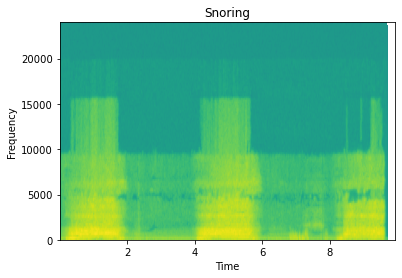

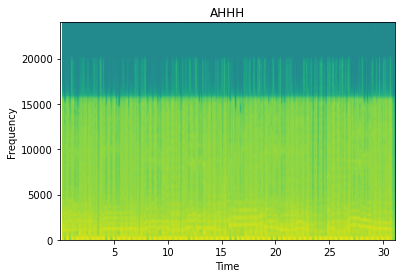

In [13]:
#Our first file is someone snoring actually. 

#The second file contains the best singing in the 21th century.

Frequency1, Song1 = wavfile.read('snoring.wav')
Frequency2, Song2 = wavfile.read('AHHH.wav')

plt.specgram(Song1[:,0],Fs=Frequency1)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Snoring')
plt.show()

plt.specgram(Song2[:,0],Fs=Frequency2)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('AHHH')
plt.show()

## 4) Transform the spectograms into 0 expected value and 1 standard deviation dataset. Then check the expected value and deviaton.

In [14]:
audiofiles = {0:'Snoring', 1:'AHHH'}

audiochannels = {0:'left', 1:'right'}

Data = [Song1, Song2]

for file in range(2):
    
    for channel in range(2):
        
        mean = Data[file][:, channel].mean()
        
        standard_dev = Data[file][:, channel].std()
        
        print(str(audiofiles[file]) + ' file, ' + str(audiochannels[channel]) + ' channel: Mean: ' + str(mean) + ', Standard Deviation: ' + str(standard_dev))
        
        trafo_mean = ((Data[file][:, channel] - mean)/standard_dev).mean()
        
        trafo_std = ((Data[file][:, channel] - mean)/standard_dev).std()
        
        print('After transformation the Mean is: ' + str(trafo_mean) + ' and the Standard Deviation is ' + str(trafo_std))

Snoring file, left channel: Mean: -0.3908886424571988, Standard Deviation: 3455.948797486214
After transformation the Mean is: 8.74843110492763e-18 and the Standard Deviation is 1.0000000000000004
Snoring file, right channel: Mean: -0.3908886424571988, Standard Deviation: 3455.9487966254815
After transformation the Mean is: 9.140184032137873e-18 and the Standard Deviation is 1.0000000000000002
AHHH file, left channel: Mean: -0.6670354256553066, Standard Deviation: 8347.00721694033
After transformation the Mean is: 6.034094904853862e-18 and the Standard Deviation is 1.0
AHHH file, right channel: Mean: -3.1032194602896155, Standard Deviation: 8514.163615184001
After transformation the Mean is: 1.0293491022226294e-17 and the Standard Deviation is 1.0


## 5) From a python script download all the text from the following webpage: http://smartlab.tmit.bme.hu/oktatas-deep-learning. Print the text out then use a histogram for showing how many times a letter appeared.

In [15]:
url = 'http://smartlab.tmit.bme.hu/oktatas-deep-learning'

page = urlopen(url)

html = page.read().decode("utf-8")

soup = BeautifulSoup(html, "html.parser")

output = soup.get_text()

print(output)

﻿



  

Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT


















































Languages


Magyar

English







Menü be/kikapcsolás











                            RÓLUNK
                        

Laborunkról
Munkatársaink
Média megjelenések






                            MEGOLDÁSAINK
                        

Profivox magyar nyelvű felolvasó (korpuszos)
Profivox magyar nyelvű felolvasó (DNN)
Profivox magyar nyelvű felolvasó (HMM)
Profivox magyar nyelvű felolvasó (diádos,triádos)
StrokeAid

Alkalmazások

Jaws for Windows integráció
Időjárás mindenkinek (magyar, Windows 8)
AALFred (5 nyelven, Windows 8.1)
Robobraille
Beszélő ATM-ek

Gyógyszervonal (OGYI)

Árlista felolvasó (T-mobile)
Keleti pályaudvar bemondórendszere
Mindenség elmélete c. film gépi beszéd szinkron








                            K+F
                        


Kutatási projektek (folyamatban)
Kutatási projektek (befejezett)
Publikációk (összes

Now we check the second part of the excercise.

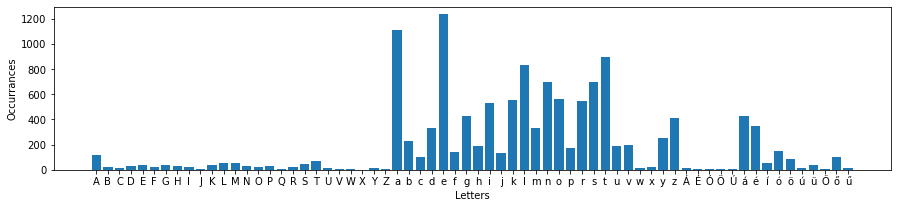

In [16]:
coll = collections.Counter(output)

dictionary_letters = collections.OrderedDict(sorted(coll.items()))

output_dict={}

for key, value in dictionary_letters.items():
    
    if key.isalpha():
        
        output_dict[key]=value
        
plt.figure(figsize=(15,3))
plt.bar(output_dict.keys(),output_dict.values())
plt.xlabel('Letters')
plt.ylabel('Occurrances')
plt.show()